# **Assignment 1 PMS** 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


### **Question 1**
The data are tabulated into rows, one for each compound, and columns that include a common name, molecular weight, critical temperature (K), acentric factor, and the normal boiling point (K). Extract the data and place it into a matrix (array) AllData to use further on. 
 
#### Part (a) 
Extract the boiling points from the data and place them in a column vector. Similarly, extract the molecular weights in a second vector. Plot the normal boiling point as a function of the molecular weight of the compounds in the database. Fit a straight line through the data and find the R2 value.

In [2]:
data = pd.read_excel(r'D:\Desktop_D\Assigmnet PMS\data_file.xlsx')
data

,Unnamed: 0,name,molweight,critical temperature (K),acentric factor,boiling point (K)
0,1,(+)-a-pinene,136.23704,647.00,0.3410,428.65
1,2,(+)-camphene,136.23704,638.00,0.2960,432.65
2,3,(-)-a-pinene,136.23704,647.00,0.3410,429.35
3,4,(-)-b-citronellol,156.26820,656.59,0.6120,498.65
4,5,(-)-camphene,136.23704,638.00,0.2960,439.95
...,...,...,...,...,...,...
6026,6136,water,18.01528,647.13,0.3449,373.15
6027,6137,xylenes,106.16740,620.21,0.3170,413.15
6028,6142,zirconium bromide,410.84000,805.00,0.3100,633.15
6029,6143,zirconium chloride,233.03480,778.00,0.2980,604.15


In [3]:
column = ['name','molweight','boiling point (K)']

In [4]:
df = data[column]

In [5]:
df

,name,molweight,boiling point (K)
0,(+)-a-pinene,136.23704,428.65
1,(+)-camphene,136.23704,432.65
2,(-)-a-pinene,136.23704,429.35
3,(-)-b-citronellol,156.26820,498.65
4,(-)-camphene,136.23704,439.95
...,...,...,...
6026,water,18.01528,373.15
6027,xylenes,106.16740,413.15
6028,zirconium bromide,410.84000,633.15
6029,zirconium chloride,233.03480,604.15


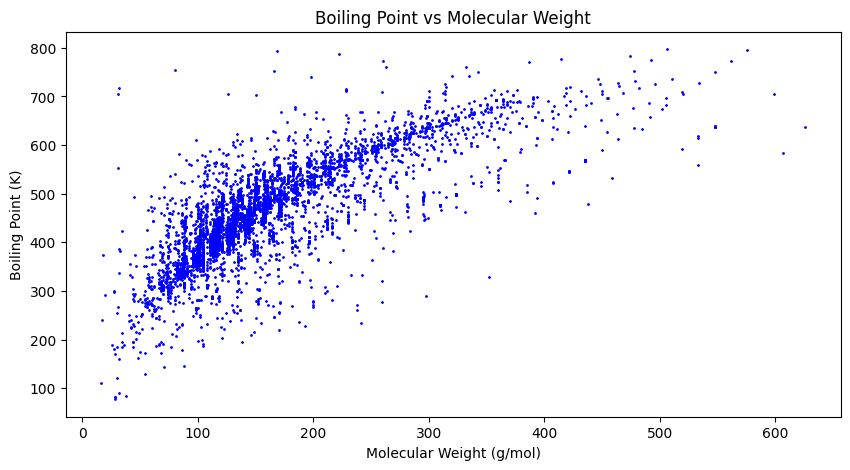

In [6]:
X = df['molweight']
Y = df['boiling point (K)']

# Ploting graph for getting insight about the relation between the molweight and boiling temperature

plt.figure(figsize=(10,5)) 
plt.scatter(X, Y, s=1,color='blue', label='Data Points')
plt.xlabel('Molecular Weight (g/mol)')
plt.ylabel('Boiling Point (K)')
plt.title('Boiling Point vs Molecular Weight')
plt.show()

# plt.scatter(X,Y)

In [7]:
x= X.to_numpy(float)
y = Y.to_numpy(float)

In [8]:
y=y.reshape(-1,1)
x= x.reshape(-1,1)

In [9]:
from sklearn.linear_model import LinearRegression

LinearReg = LinearRegression()

LinearReg.fit(x,y)


LinearRegression()

In [10]:
pred = LinearReg.predict(x)

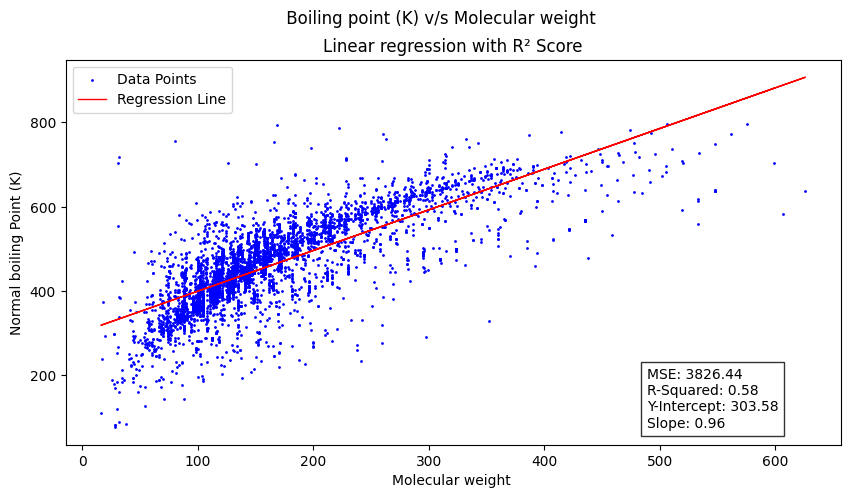

In [11]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y,pred)
r2_e = r2_score(y,pred)
textstr = f"MSE: {mse:.2f}\nR-Squared: {r2_e:.2f}\nY-Intercept: {LinearReg.intercept_[0]:.2f}\nSlope: {LinearReg.coef_[0][0]:.2f}"

plt.figure(figsize=(10,5)) 
plt.scatter(X, Y, s=1,color='blue', label='Data Points',)
plt.plot(x,pred, color='red', linewidth=1, label='Regression Line')
plt.text(0.75, 0.2, textstr, transform=plt.gca().transAxes, fontsize=10, 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.title("Linear regression with R² Score")
plt.suptitle(" Boiling point (K) v/s Molecular weight ")
plt.xlabel("Molecular weight ")
plt.ylabel("Normal boiling Point (K)")
plt.legend()

In [12]:
#Results
# Add Text Annotations
# textstr = f"Mean Squared Error: {mse:.4f}\nR-Squared: {r2_e:.4f}\nY-Intercept: {LinearReg.intercept_[0]:.2f}\nSlope: {LinearReg.coef_[0][0]:.2f}"
# plt.text(0.05, 0.85, textstr, transform=plt.gca().transAxes, fontsize=12, 
#          verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

print("Mean Squared Error : ", mse)
print("R-Squared :" , r2_e)
print("Y-intercept :" , LinearReg.intercept_[0])
print("Slope :" , LinearReg.coef_[0][0])

Mean Squared Error :  3826.4376887251274
R-Squared : 0.5799762792252354
Y-intercept : 303.5846222149048
Slope : 0.9640039241292739


#### part (b) 
While we could use all the data we have to produce a meaningful correlation, let us assume that not all 
of the data were available. We will select a training set, or set of data that will be used to inform our ML 
algorithm. Extract from AllData 100 random data compounds. Using these selected compounds, build a 
100 × 3 matrix, which we call X, where each row corresponds to a training example (i.e., the data for a 
given compound). For each one of these rows the first column is the number 1 (corresponding to x0) and 
the next two columns correspond to the values of x1 and x2 (**molecular weight and acentric factor**).
Create another column matrix y with all the corresponding expected results; i.e., each of the elements of the 
vector is the expected **reduced boiling point (Tb/ Tc)** of each training example. The resulting 𝒚 vector is a 
100 × 1 vector. The “solution” of this problem can be found directly as 
                                
                                𝜽=(𝑿𝑻𝑿)−𝟏 𝑿𝑻 𝒚  
                    
Calculate the values of the coefficients 𝜃0, 𝜃1 and 𝜃2, to evaluate the quality of the correlation. 

In [13]:
data.head()

,Unnamed: 0,name,molweight,critical temperature (K),acentric factor,boiling point (K)
0,1,(+)-a-pinene,136.23704,647.00,0.341,428.65
1,2,(+)-camphene,136.23704,638.00,0.296,432.65
2,3,(-)-a-pinene,136.23704,647.00,0.341,429.35
3,4,(-)-b-citronellol,156.26820,656.59,0.612,498.65
4,5,(-)-camphene,136.23704,638.00,0.296,439.95


In [14]:
data['reduced_boiling_point (Tb/Tc)'] = data['boiling point (K)']/data['critical temperature (K)']


In [15]:
df_2= data[['name', 'molweight', 'acentric factor','reduced_boiling_point (Tb/Tc)']]

In [16]:
data_q2=  df_2.sample(n=100,random_state=42)

In [17]:
data_q2.insert(1, 'bias',1)

In [18]:
data_q2

,name,bias,molweight,acentric factor,reduced_boiling_point (Tb/Tc)
1870,"2,4,4-trimethyl-2-pentanol",1,130.23032,0.639,0.723412
2584,2-methyl-5-nonanone,1,156.26820,0.612,0.725948
1328,1-phenylnaphthalene,1,204.27128,0.531,0.715135
5083,isopropyl octanoate,1,186.29448,0.639,0.751120
3413,3-nonanone,1,142.24132,0.541,0.735567
...,...,...,...,...,...
1487,"2,2,4-trimethyl-4-heptanol",1,158.28408,0.724,0.745095
408,"1,1-diphenyl-1-tetradecene",1,348.57184,0.804,0.801102
2707,2-pentadecanone,1,226.40260,0.787,0.780896
2890,"3,4,5-trimethylphenol",1,136.19368,0.494,0.689426


In [19]:
X = np.array(data_q2[['bias','molweight', 'acentric factor']])
y = np.array(data_q2[['reduced_boiling_point (Tb/Tc)']])

In [20]:
X

array([[1.00000000e+00, 1.30230320e+02, 6.39000000e-01],
       [1.00000000e+00, 1.56268200e+02, 6.12000000e-01],
       [1.00000000e+00, 2.04271280e+02, 5.31000000e-01],
       [1.00000000e+00, 1.86294480e+02, 6.39000000e-01],
       [1.00000000e+00, 1.42241320e+02, 5.41000000e-01],
       [1.00000000e+00, 1.96030930e+02, 2.61000000e-01],
       [1.00000000e+00, 1.70338440e+02, 4.32000000e-01],
       [1.00000000e+00, 1.70338440e+02, 5.19000000e-01],
       [1.00000000e+00, 1.40268800e+02, 4.57000000e-01],
       [1.00000000e+00, 1.42284680e+02, 3.97000000e-01],
       [1.00000000e+00, 9.05522800e+01, 2.42000000e-01],
       [1.00000000e+00, 1.50309160e+02, 3.70000000e-01],
       [1.00000000e+00, 6.61478800e+01, 3.66000000e-01],
       [1.00000000e+00, 1.62229120e+02, 6.81000000e-01],
       [1.00000000e+00, 1.26241920e+02, 3.34000000e-01],
       [1.00000000e+00, 1.12215040e+02, 3.39000000e-01],
       [1.00000000e+00, 1.46659800e+02, 4.30000000e-01],
       [1.00000000e+00, 1.14187

In [21]:
# Calculating Theta using the Normal Equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

In [22]:
theta

array([[5.95796567e-01],
       [2.01872653e-04],
       [1.54616024e-01]])

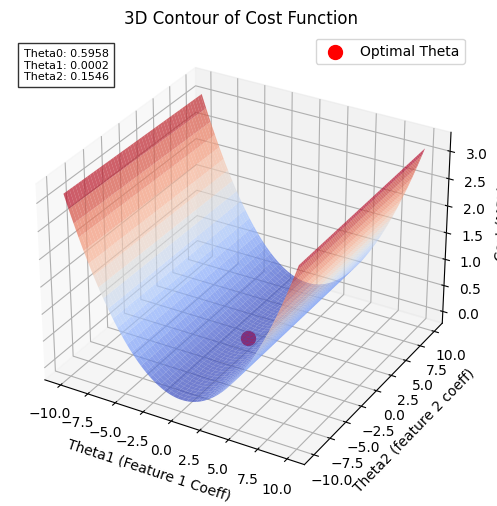

In [23]:
theta_optimal = theta
# Create a range of theta values to visualize loss
theta0_vals = np.linspace(-10, 10, 100)  # Range for theta0
theta1_vals = np.linspace(-10, 10, 100)  # Range for t
# Compute Loss (Mean Squared Error) for each theta combination
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta_test = np.array([[theta0_vals[i]], [theta1_vals[j]], [theta_optimal[2, 0]]])
        y_pred = X @ theta_test  # Compute Predictions
        J_vals[i, j] = ((y_pred - y) ** 2).mean()  # MSE Loss

# Convert to Meshgrid for 3D Plot
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# Create 3D Contour Plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
# Plot the loss surface
ax.plot_surface(T0, T1, J_vals, cmap="coolwarm", alpha=0.7)

# Highlight the Optimal Theta
ax.scatter(theta_optimal[1], theta_optimal[2], np.min(J_vals), color="red", marker="o", s=100, label="Optimal Theta")

# Labels and Titles
ax.set_ylabel("Theta2 (feature 2 coeff)")
ax.set_xlabel("Theta1 (Feature 1 Coeff)")
ax.set_zlabel("Cost (MSE)")
ax.set_title("3D Contour of Cost Function")
ax.legend()

# **Add Theta Values as a Text Box in the 3D Plot**
textstr = f"Theta0: {theta_optimal[0,0]:.4f}\nTheta1: {theta_optimal[1,0]:.4f}\nTheta2: {theta_optimal[2,0]:.4f}"
ax.text2D(0.15, 0.8, textstr, transform=fig.transFigure, fontsize=8, 
          bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.show()

Optimal Theta:
[5.95796567e-01 2.01872653e-04 1.54616024e-01]
R-Squared: 0.7861
Mean Squared Error: 0.0004


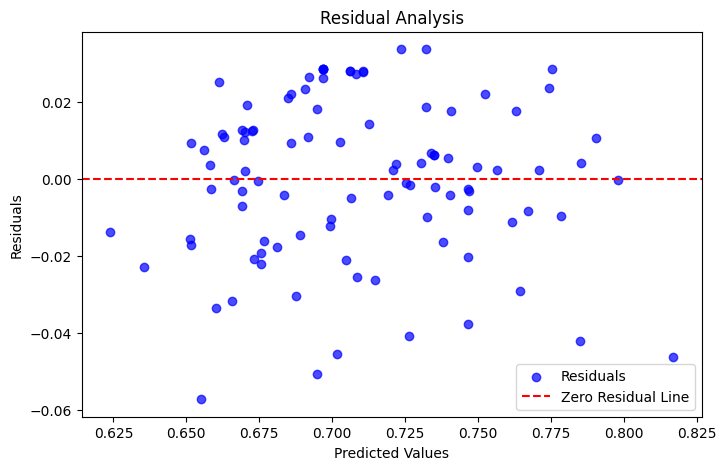

In [24]:
# Predict using Theta
y_pred = X @ theta_optimal

# Calculate R^2 Score
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Print Evaluation Metrics
print(f"Optimal Theta:\n{theta_optimal.ravel()}")
print(f"R-Squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# **Plot Residual Analysis**
residuals = y - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7, label="Residuals")
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.legend()
plt.show()


In [25]:
data

,Unnamed: 0,name,molweight,critical temperature (K),acentric factor,boiling point (K),reduced_boiling_point (Tb/Tc)
0,1,(+)-a-pinene,136.23704,647.00,0.3410,428.65,0.662519
1,2,(+)-camphene,136.23704,638.00,0.2960,432.65,0.678135
2,3,(-)-a-pinene,136.23704,647.00,0.3410,429.35,0.663601
3,4,(-)-b-citronellol,156.26820,656.59,0.6120,498.65,0.759454
4,5,(-)-camphene,136.23704,638.00,0.2960,439.95,0.689577
...,...,...,...,...,...,...,...
6026,6136,water,18.01528,647.13,0.3449,373.15,0.576623
6027,6137,xylenes,106.16740,620.21,0.3170,413.15,0.666145
6028,6142,zirconium bromide,410.84000,805.00,0.3100,633.15,0.786522
6029,6143,zirconium chloride,233.03480,778.00,0.2980,604.15,0.776542


#### **Part c**
From the matrix AllData retrieve two column vectors, one called InputData, which will have two 
columns, the MW and the acentric factor of all the data in the original set and a second matrix called 
TargetData which contains the reduced boiling point data. 
Develop a neural network for this data, and train the network, using only 10% of the data. Present the 
results of the output.

In [26]:
InputData = data[['molweight','acentric factor']]
TargetData = data[['reduced_boiling_point (Tb/Tc)']]

In [27]:
TargetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6031 entries, 0 to 6030
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   reduced_boiling_point (Tb/Tc)  6031 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [28]:
InputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6031 entries, 0 to 6030
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   molweight        6031 non-null   float64
 1   acentric factor  6031 non-null   float64
dtypes: float64(2)
memory usage: 94.4 KB


C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.8719 - mae: 0.9190 - val_loss: 0.5563 - val_mae: 0.7426
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.4966 - mae: 0.7011 - val_loss: 0.3929 - val_mae: 0.6231
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.3711 - mae: 0.6041 - val_loss: 0.3051 - val_mae: 0.5443
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.2890 - mae: 0.5276 - val_loss: 0.2265 - val_mae: 0.4616
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.2015 - mae: 0.4310 - val_loss: 0.1498 - val_mae: 0.3619
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.1309 - mae: 0.3318 - val_loss: 0.0913 - val_mae: 0.2664
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0799 - mae: 0.2451 - val_loss: 0.0585 - val_mae: 0.2044
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0536 - mae: 0.1905 - val_loss: 0.0451 - val_mae: 0.1748
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/st

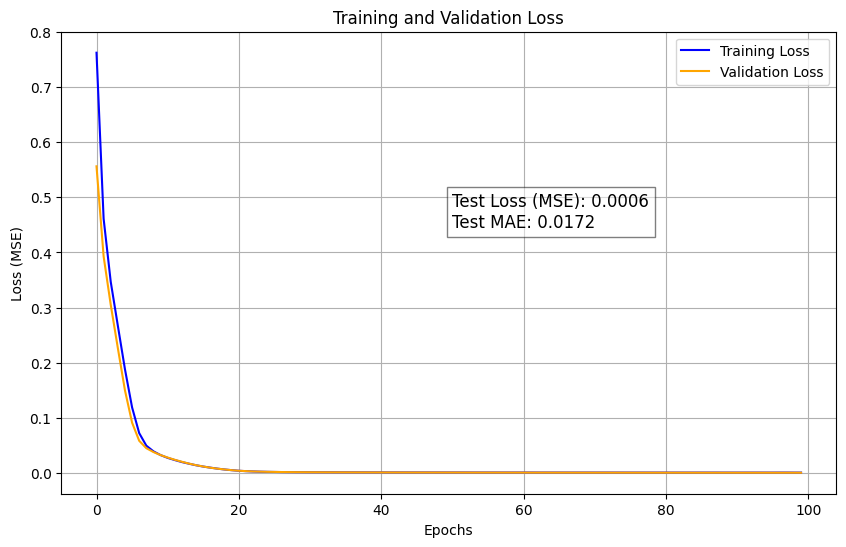

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
First 5 Predictions: [0.707116   0.7217916  0.70937705 0.73771954 0.72909164]


In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize input features
scaler = StandardScaler()
InputData = scaler.fit_transform(InputData)

# Split the data (10% training, 90% testing)
X_train, X_test, y_train, y_test = train_test_split(InputData, TargetData, test_size=0.9, random_state=42)

# Define the Neural Network model
def create_model(hidden_layers=1, neurons_per_layer=16):
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons_per_layer, activation='relu', input_shape=(2,)))  # Input layer
    
    for _ in range(hidden_layers - 1):  # Adding hidden layers
        model.add(keras.layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='linear'))  # Output layer for regression
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create and train the model
model = create_model(hidden_layers=3, neurons_per_layer=16)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.4f}, Test MAE: {mae:.4f}')

# Plot training & validation loss with statistics on the graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')

# Add statistics to the graph
stats_text = f'Test Loss (MSE): {loss:.4f}\nTest MAE: {mae:.4f}'
plt.text(0.5 * len(history.history['loss']), max(history.history['val_loss']) * 0.8,
         stats_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.grid(True)
plt.show()

# Make predictions
y_pred = model.predict(X_test)
print("First 5 Predictions:", y_pred[:5].flatten())


C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.2740 - mae: 0.5009 - val_loss: 0.1319 - val_mae: 0.3295
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1124 - mae: 0.2983 - val_loss: 0.0505 - val_mae: 0.1851
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0386 - mae: 0.1605 - val_loss: 0.0308 - val_mae: 0.1443
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0238 - mae: 0.1281 - val_loss: 0.0186 - val_mae: 0.1104
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0151 - mae: 0.0998 - val_loss: 0.0107 - val_mae: 0.0807
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096 - mae: 0.0746 - val_loss: 0.0062 - val_mae: 0.0577
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0051 - mae: 0.0527 - val_loss: 0.0041 - val_mae: 0.0431
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0034 - mae: 0.0395 - val_loss: 0.0030 - val_mae: 0.0377
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0027 -

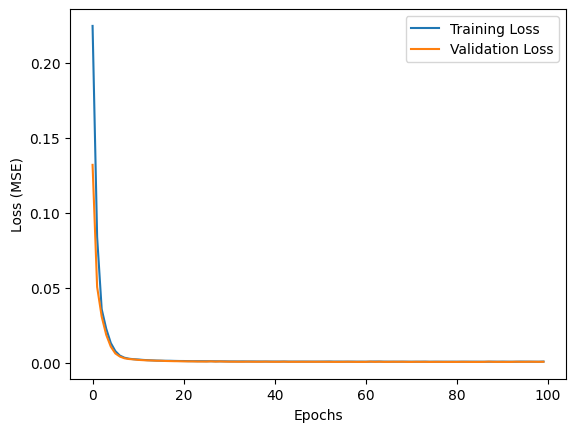

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
First 5 Predictions: [0.70743394 0.7233223  0.7178701  ... 0.6754718  0.6542371  0.7150422 ]


In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize input features
scaler = StandardScaler()
InputData = scaler.fit_transform(InputData)

# Split the data (10% training, 90% testing)
X_train, X_test, y_train, y_test = train_test_split(InputData, TargetData, test_size=0.9, random_state=42)

# Define the Neural Network model
def create_model(hidden_layers=1, neurons_per_layer=16):
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons_per_layer, activation='relu', input_shape=(2,)))  # Input layer
    
    for _ in range(hidden_layers - 1):  # Adding hidden layers
        model.add(keras.layers.Dense(neurons_per_layer, activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='linear'))  # Output layer for regression
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Create and train the model
model = create_model(hidden_layers=3, neurons_per_layer=16)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.4f}, Test MAE: {mae:.4f}')

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)
print("First 5 Predictions:", y_pred[:].flatten())


In [31]:
y_pred = model.predict(X_test)
print("First 5 Predictions:", y_pred[:].flatten())

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
First 5 Predictions: [0.70743394 0.7233223  0.7178701  ... 0.6754718  0.6542371  0.7150422 ]


In [32]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,829 (7.15 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,220 (4.77 KB)

In [33]:
# Create and train the model
model = create_model(hidden_layers=1, neurons_per_layer=32)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.4f}, Test MAE: {mae:.4f}')



C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.5306 - mae: 0.7166 - val_loss: 0.3496 - val_mae: 0.5764
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.2902 - mae: 0.5192 - val_loss: 0.1862 - val_mae: 0.4025
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1645 - mae: 0.3734 - val_loss: 0.1099 - val_mae: 0.2966
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0960 - mae: 0.2755 - val_loss: 0.0684 - val_mae: 0.2261
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0590 - mae: 0.2070 - val_loss: 0.0463 - val_mae: 0.1820
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0439 - mae: 0.1760 - val_loss: 0.0352 - val_mae: 0.1565
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0316 - mae: 0.1456 - val_loss: 0.0289 - val_mae: 0.1403
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0259 - mae: 0.1334 - val_loss: 0.0244 - val_mae: 0.1280
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - l

In [34]:
min_loss = 10000
min_mae = 10000
best_parameters = {'hidden_layers': [], 'neurons_per_layer': [], 'min_loss': [], "min_mae":[]}
param_grid ={'hidden_layers': [1, 2, 3, 4], 'neurons_per_layer': [16, 32, 64]}
for layer in param_grid['hidden_layers']:
    for neuron_per_layer in param_grid['neurons_per_layer']:
      print("#"*100)
      print(f'\tFor Layers = {layer} \nFor Neuron_per_layers = {neuron_per_layer}')
      # Create and train the model  
      model = create_model(hidden_layers=1, neurons_per_layer=32)
      history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=1)
      # Evaluate the model
      loss, mae = model.evaluate(X_test, y_test)
      print(f'Test Loss (MSE): {loss:.4f}, Test MAE: {mae:.4f}')
      if loss < min_loss:
        min_loss = loss
        min_mae = mae
        best_parameters = {'hidden_layers': layer, 'neurons_per_layer': neuron_per_layer,'min_loss': min_loss, "min_mae":min_mae }

print(f"Best Parameters:\n"
      f"Hidden Layers: {best_parameters['hidden_layers']}\n"
      f"Neurons per Layer: {best_parameters['neurons_per_layer']}\n"
      f"Minimum Loss: {best_parameters['min_loss']}\n"
      f"Minimum MAE: {best_parameters['min_mae']}")

####################################################################################################
	For Layers = 1 
For Neuron_per_layers = 16


C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.4297 - mae: 0.6422 - val_loss: 0.2288 - val_mae: 0.4494
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.1887 - mae: 0.3975 - val_loss: 0.1151 - val_mae: 0.2957
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1015 - mae: 0.2714 - val_loss: 0.0806 - val_mae: 0.2433
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0733 - mae: 0.2292 - val_loss: 0.0614 - val_mae: 0.2103
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0581 - mae: 0.2037 - val_loss: 0.0459 - val_mae: 0.1808
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0438 - mae: 0.1759 - val_loss: 0.0344 - val_mae: 0.1556
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0299 - mae: 0.1442 - val_loss: 0.0256 - val_mae: 0.1325
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0238 - mae: 0.1255 - val_loss: 0.0192 - val_mae: 0.1140
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.3007 - mae: 0.5063 - val_loss: 0.1787 - val_mae: 0.3780
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1382 - mae: 0.3231 - val_loss: 0.1028 - val_mae: 0.2740
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0951 - mae: 0.2602 - val_loss: 0.0769 - val_mae: 0.2320
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0784 - mae: 0.2353 - val_loss: 0.0614 - val_mae: 0.2056
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0564 - mae: 0.1937 - val_loss: 0.0493 - val_mae: 0.1830
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0464 - mae: 0.1742 - val_loss: 0.0394 - val_mae: 0.1622
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0370 - mae: 0.1549 - val_loss: 0.0314 - val_mae: 0.1437
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0278 - mae: 0.1358 - val_loss: 0.0252 - val_mae: 0.1281
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.5198 - mae: 0.6879 - val_loss: 0.3019 - val_mae: 0.5110
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2566 - mae: 0.4628 - val_loss: 0.1571 - val_mae: 0.3538
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1306 - mae: 0.3195 - val_loss: 0.0896 - val_mae: 0.2622
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0786 - mae: 0.2415 - val_loss: 0.0588 - val_mae: 0.2064
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0534 - mae: 0.1927 - val_loss: 0.0447 - val_mae: 0.1759
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0405 - mae: 0.1679 - val_loss: 0.0367 - val_mae: 0.1566
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0353 - mae: 0.1528 - val_loss: 0.0309 - val_mae: 0.1424
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0266 - mae: 0.1320 - val_loss: 0.0261 - val_mae: 0.1295
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.2676 - mae: 0.4332 - val_loss: 0.1926 - val_mae: 0.3646
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1699 - mae: 0.3384 - val_loss: 0.1358 - val_mae: 0.3106
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1278 - mae: 0.3003 - val_loss: 0.0955 - val_mae: 0.2627
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0859 - mae: 0.2439 - val_loss: 0.0652 - val_mae: 0.2173
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0629 - mae: 0.2096 - val_loss: 0.0422 - val_mae: 0.1753
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0401 - mae: 0.1693 - val_loss: 0.0269 - val_mae: 0.1394
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0240 - mae: 0.1300 - val_loss: 0.0168 - val_mae: 0.1095
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0160 - mae: 0.1041 - val_loss: 0.0105 - val_mae: 0.0867
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.1570 - mae: 0.3394 - val_loss: 0.1213 - val_mae: 0.2937
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1111 - mae: 0.2725 - val_loss: 0.0846 - val_mae: 0.2332
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0694 - mae: 0.2129 - val_loss: 0.0667 - val_mae: 0.2015
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0545 - mae: 0.1901 - val_loss: 0.0508 - val_mae: 0.1732
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0437 - mae: 0.1637 - val_loss: 0.0374 - val_mae: 0.1462
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0316 - mae: 0.1340 - val_loss: 0.0270 - val_mae: 0.1213
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0197 - mae: 0.1075 - val_loss: 0.0194 - val_mae: 0.0989
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0138 - mae: 0.0888 - val_loss: 0.0138 - val_mae: 0.0807
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.3019 - mae: 0.5325 - val_loss: 0.1916 - val_mae: 0.4083
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1580 - mae: 0.3619 - val_loss: 0.1179 - val_mae: 0.2971
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0879 - mae: 0.2553 - val_loss: 0.0771 - val_mae: 0.2274
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0586 - mae: 0.2039 - val_loss: 0.0566 - val_mae: 0.1942
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0481 - mae: 0.1778 - val_loss: 0.0462 - val_mae: 0.1742
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0430 - mae: 0.1671 - val_loss: 0.0383 - val_mae: 0.1577
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0300 - mae: 0.1406 - val_loss: 0.0312 - val_mae: 0.1426
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0249 - mae: 0.1316 - val_loss: 0.0253 - val_mae: 0.1271
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.6271 - mae: 0.7506 - val_loss: 0.3974 - val_mae: 0.5904
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.3535 - mae: 0.5531 - val_loss: 0.2186 - val_mae: 0.4297
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1927 - mae: 0.4031 - val_loss: 0.1233 - val_mae: 0.3193
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1067 - mae: 0.2964 - val_loss: 0.0733 - val_mae: 0.2398
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0638 - mae: 0.2205 - val_loss: 0.0488 - val_mae: 0.1871
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0398 - mae: 0.1676 - val_loss: 0.0378 - val_mae: 0.1615
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0337 - mae: 0.1542 - val_loss: 0.0318 - val_mae: 0.1479
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0255 - mae: 0.1356 - val_loss: 0.0276 - val_mae: 0.1374
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2474 - mae: 0.4663 - val_loss: 0.1666 - val_mae: 0.3716
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1369 - mae: 0.3318 - val_loss: 0.0992 - val_mae: 0.2700
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0907 - mae: 0.2549 - val_loss: 0.0692 - val_mae: 0.2185
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0649 - mae: 0.2113 - val_loss: 0.0540 - val_mae: 0.1913
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0503 - mae: 0.1836 - val_loss: 0.0420 - val_mae: 0.1691
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0371 - mae: 0.1604 - val_loss: 0.0323 - val_mae: 0.1486
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0285 - mae: 0.1373 - val_loss: 0.0241 - val_mae: 0.1285
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0209 - mae: 0.1207 - val_loss: 0.0177 - val_mae: 0.1080
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2807 - mae: 0.5110 - val_loss: 0.1622 - val_mae: 0.3685
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1410 - mae: 0.3378 - val_loss: 0.0935 - val_mae: 0.2593
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0845 - mae: 0.2448 - val_loss: 0.0720 - val_mae: 0.2201
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0646 - mae: 0.2059 - val_loss: 0.0599 - val_mae: 0.1989
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0504 - mae: 0.1793 - val_loss: 0.0501 - val_mae: 0.1814
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0440 - mae: 0.1672 - val_loss: 0.0413 - val_mae: 0.1644
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0321 - mae: 0.1453 - val_loss: 0.0339 - val_mae: 0.1487
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0292 - mae: 0.1374 - val_loss: 0.0274 - val_mae: 0.1326
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.2728 - mae: 0.4344 - val_loss: 0.2049 - val_mae: 0.3823
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.1809 - mae: 0.3598 - val_loss: 0.1375 - val_mae: 0.3112
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.1117 - mae: 0.2800 - val_loss: 0.0930 - val_mae: 0.2540
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0787 - mae: 0.2357 - val_loss: 0.0639 - val_mae: 0.2064
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0564 - mae: 0.1929 - val_loss: 0.0434 - val_mae: 0.1703
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0362 - mae: 0.1588 - val_loss: 0.0311 - val_mae: 0.1420
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0248 - mae: 0.1288 - val_loss: 0.0222 - val_mae: 0.1203
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0187 - mae: 0.1123 - val_loss: 0.0161 - val_mae: 0.1022
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - lo

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 833ms/step - loss: 0.5707 - mae: 0.6252 - val_loss: 0.3405 - val_mae: 0.4912
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.2657 - mae: 0.4332 - val_loss: 0.1760 - val_mae: 0.3591
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.1413 - mae: 0.3216 - val_loss: 0.0867 - val_mae: 0.2564
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0763 - mae: 0.2367 - val_loss: 0.0476 - val_mae: 0.1847
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0404 - mae: 0.1659 - val_loss: 0.0356 - val_mae: 0.1557
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0298 - mae: 0.1427 - val_loss: 0.0295 - val_mae: 0.1398
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0242 - mae: 0.1283 - val_loss: 0.0237 - val_mae: 0.1245
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0189 - mae: 0.1141 - val_loss: 0.0191 - val_mae: 0.1115
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - 

C:\Users\RDRL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.3834 - mae: 0.5559 - val_loss: 0.2252 - val_mae: 0.4277
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1894 - mae: 0.3896 - val_loss: 0.1122 - val_mae: 0.2913
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0931 - mae: 0.2587 - val_loss: 0.0728 - val_mae: 0.2265
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0646 - mae: 0.2133 - val_loss: 0.0599 - val_mae: 0.2014
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0518 - mae: 0.1881 - val_loss: 0.0516 - val_mae: 0.1853
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0459 - mae: 0.1732 - val_loss: 0.0439 - val_mae: 0.1700
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0397 - mae: 0.1641 - val_loss: 0.0372 - val_mae: 0.1557
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0348 - mae: 0.1544 - val_loss: 0.0314 - val_mae: 0.1412
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - lo

### **Best Parameters:**
Hidden Layers: 3
Neurons per Layer: 16
Minimum Loss: 0.0005707242526113987
Minimum MAE: 0.01662134937942028

In [ ]:
# best_parameters = {'hidden_layers': [], 'neurons_per_layer': [], 'min_loss': [], "min_mae":[]}
print(f"Best Parameters:\n"
      f"Hidden Layers: {best_parameters['hidden_layers']}\n"
      f"Neurons per Layer: {best_parameters['neurons_per_layer']}\n"
      f"Minimum Loss: {best_parameters['min_loss']}\n"
      f"Minimum MAE: {best_parameters['min_mae']}")


Best Parameters:
Hidden Layers: 3
Neurons per Layer: 16
Minimum Loss: 0.0005707242526113987
Minimum MAE: 0.01662134937942028


In [ ]:
# from tensorflow.keras.utils import plot_model

# # Create the model
# model = create_model(hidden_layers=3, neurons_per_layer=16)

# # Visualize model architecture
# plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)

%reload_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard

# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

# Train the model with TensorBoard
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

# Launch TensorBoard
%tensorboard --logdir ./logs


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 8.9733e-04 - mae: 0.0176 - val_loss: 6.5182e-04 - val_mae: 0.0187
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.5822e-04 - mae: 0.0183 - val_loss: 6.6315e-04 - val_mae: 0.0179
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.0495e-04 - mae: 0.0179 - val_loss: 6.3916e-04 - val_mae: 0.0182
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0012 - mae: 0.0192 - val_loss: 6.3186e-04 - val_mae: 0.0180
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.1002e-04 - mae: 0.0170 - val_loss: 6.4546e-04 - val_mae: 0.0179
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.5805e-04 - mae: 0.0168 - val_loss: 6.3201e-04 - val_mae: 0.0179
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.2534e-04 - mae: 0.0167 - val_loss: 6.2507e-04 - val_mae: 0.0180
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.8995e-04 - mae: 0.0183 - val_loss: 6.7773e-04 - val_mae: 0.0180
Epoc

Reusing TensorBoard on port 6006 (pid 33536), started 3:46:31 ago. (Use '!kill 33536' to kill it.)

In [ ]:
import sklearn
import scikeras

print("scikit-learn version:", sklearn.__version__)
print("scikeras version:", scikeras.__version__)


scikit-learn version: 1.2.2
scikeras version: 0.13.0
